In [1]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [75]:
with open('/content/drive/My Drive/Main/maltest.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/engtest.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/testimages.txt') as file:
   test_images = file.read().split('\n')


In [76]:
len(test_images)

1401

In [78]:
len( eng_txt)

1401

In [81]:
eng_txt[-1]

'English city bus on the road\t'

In [82]:
 mal_txt[-1]

''

In [80]:
eng_txt.pop()

''

In [83]:
mal_txt.pop()

''

In [84]:
test_images.pop()

''

In [88]:
img_path=[]
for s in test_images:
    img_path.append("/content/drive/My Drive/Main/test1/"+s)

In [ ]:
len(train_images)

8931

In [40]:
len(img_path)

999

/content/drive/My Drive/Main/test1/245.jpg
mal:ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു
eng:beige stair way going to second level	


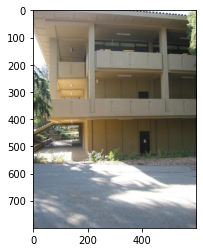

In [89]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[3])
print("mal:"+mal_txt[3])
print("eng:"+eng_txt[3])

/content/drive/My Drive/Main/test1/98.jpg
mal:ചട്ടിയിൽ രണ്ടാമത്തെ പിസ്സ
eng:a second pizza in a pan	


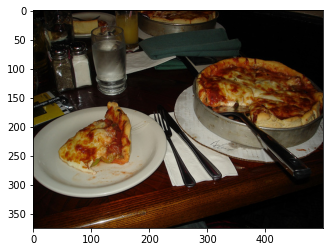

In [90]:
im=mp.imread(img_path[2])
plt.imshow(im)
print(img_path[2])
print("mal:"+mal_txt[2])
print("eng:"+eng_txt[2])

/content/drive/My Drive/Main/test1/2417918.jpg
mal:റോഡിൽ ഇംഗ്ലീഷ് സിറ്റി ബസ്
eng:English city bus on the road	


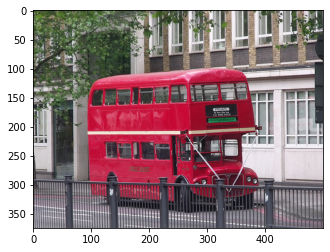

In [91]:
im=mp.imread(img_path[-1])
plt.imshow(im)
print(img_path[-1])
print("mal:"+mal_txt[-1])
print("eng:"+eng_txt[-1])

In [92]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/Main/testcrop.csv')
print(df)

        X    Y    W    H
0     417   32  256   96
1     140  268   26   68
2     308   89  162  118
3       0  406   67   47
4     294   51  206  235
...   ...  ...  ...  ...
1395   47  430  436   62
1396  135  152  183  333
1397   12  156   65   67
1398   10    9  252  275
1399   90   98  301  238

[1400 rows x 4 columns]


In [ ]:
#Xi=df['X'].values[0]
#print(type(Xi))

<class 'numpy.int64'>


In [ ]:
'''
for i in range(len(dfnew)):
    temp=mp.imread(img_path[i])
    cropped_image = im[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
#cv2.imwrite('contour1.png', cropped_image)
'''

In [47]:
pip install keras-applications

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [48]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [49]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
tf.keras.utils.plot_model(
    modelvgg,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

NameError: ignored

In [ ]:
dfnew=df[20001:]

In [93]:
len(df)

1400

In [ ]:
dfnew

,X,Y,W,H
20001,71,122,235,340
20002,0,253,130,53
20003,83,40,364,290
20004,197,123,90,75
20005,98,131,163,185
...,...,...,...,...
28925,63,90,363,335
28926,47,81,282,393
28927,331,71,117,57
28928,273,34,211,165


In [ ]:
import cv2

In [ ]:
img_path[1]

'/content/drive/My Drive/Main/trainimages/train/2382891.jpg'

In [94]:
splits=len(df)
dfnew=df
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+H, X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [95]:
imagedata[1]

array([[[0.682 , 0.6157, 0.5845],
        [0.682 , 0.6157, 0.5845],
        [0.682 , 0.6157, 0.5845],
        ...,
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884]],

       [[0.682 , 0.6157, 0.5845],
        [0.682 , 0.6157, 0.5845],
        [0.682 , 0.6157, 0.5845],
        ...,
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884]],

       [[0.682 , 0.6196, 0.5884],
        [0.682 , 0.6196, 0.5884],
        [0.682 , 0.6196, 0.5884],
        ...,
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884],
        [0.682 , 0.6157, 0.5884]],

       ...,

       [[0.749 , 0.2864, 0.251 ],
        [0.749 , 0.2864, 0.251 ],
        [0.749 , 0.2864, 0.251 ],
        ...,
        [0.682 , 0.2196, 0.1921],
        [0.682 , 0.2196, 0.1921],
        [0.682 , 0.2196, 0.1921]],

       [[0.749 , 0.2825, 0.251 ],
        [0.749 , 0.2825, 0.251 ],
        [0.749 , 0.2825, 0.251 ],
        .

/content/drive/My Drive/Main/test1/34.jpg
mal:ഗ്ലാസ് ബ്ലോക്ക് സ്വകാര്യ മതിൽ
eng:glass block privacy wall	


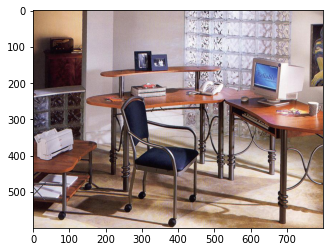

In [96]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[0])
print("eng:"+eng_txt[0])

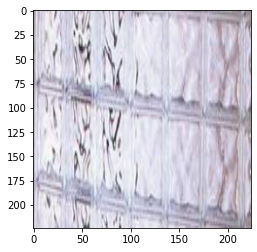

In [97]:
plt.imshow(imagedata[0].astype(np.float32))


/content/drive/My Drive/Main/test1/82.jpg
mal:കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക്
eng:knife block sitting on counter with knives in it	


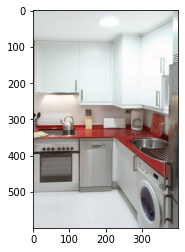

In [98]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[1])
print("eng:"+eng_txt[1])

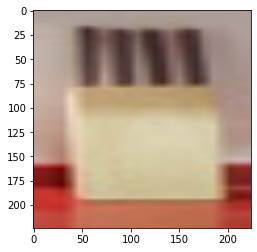

In [99]:
plt.imshow(imagedata[1].astype(np.float32))

/content/drive/My Drive/Main/test1/245.jpg
mal:ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു
eng:beige stair way going to second level	


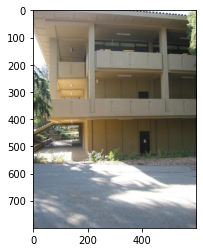

In [100]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[3])
print("mal:"+mal_txt[3])
print("eng:"+eng_txt[3])

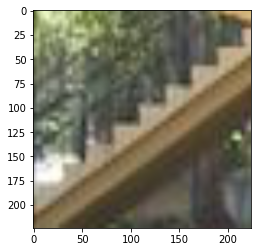

In [101]:
plt.imshow(imagedata[3].astype(np.float32))

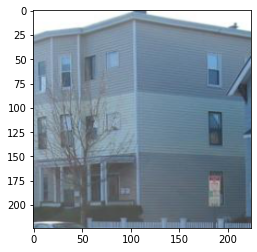

In [102]:
plt.imshow(imagedata[4].astype(np.float32))

/content/drive/My Drive/Main/test1/311.jpg
mal:ടാൻ ഹൗസിലെ ഇളം നിറമുള്ള രണ്ടാം നില
eng:tan house with lighter colored second floor	


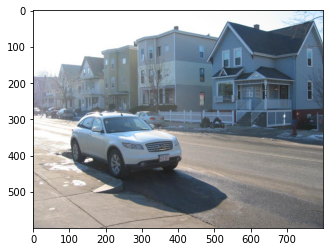

In [103]:
im=mp.imread(img_path[4])
plt.imshow(im)
print(img_path[4])
print("mal:"+mal_txt[4])
print("eng:"+eng_txt[4])

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas1.txt', 'w') as writefile:
    writefile.write("imagedata")

In [104]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/test1/34.jpg
200 /content/drive/My Drive/Main/test1/2320317.jpg
400 /content/drive/My Drive/Main/test1/2336635.jpg
600 /content/drive/My Drive/Main/test1/2355492.jpg
800 /content/drive/My Drive/Main/test1/2372313.jpg
1000 /content/drive/My Drive/Main/test1/2388082.jpg
1200 /content/drive/My Drive/Main/test1/2404051.jpg


In [105]:
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]

In [67]:
import numpy as np

In [106]:
save('/content/drive/My Drive/Main/testfeature.npy', vgg_feature)

In [107]:
save('/content/drive/My Drive/Main/testdata.npy', imagedata)